# Week 2 Assignment 3
##### Georgia Galanopoulos & Arindam Barman - Team 5

##### Goal: Load a graph database of choice. Create basic analysis on the graph, including the graph’s diameter, and at least one other metric of choice. Use a visualization tool of choice to display information.

##### For this assignment, the data used was from the KONECT (the Koblenz Network Collection) website: http://konect.uni-koblenz.de/networks/moreno_train. As the website states, the data "contains contacts between suspected terrorists involved in the train bombing of Madrid on March 11, 2004 as reconstructed from newspapers. A node represents a terrorist and an edge between two terrorists shows that there was a contact between the two terroists. The edge weights denote how 'strong' a connection was. This includes friendship and co-participating in training camps or previous attacks." The data was downloaded in a tar.bz2 file and converted into a csv file in order to be imported and used alongside GraphLab.

###### Note: GraphLab plot images are added below the graph in case images are not displayed in GitHub.

# GraphLab
##### Import graphlab and networkx and csv file

In [12]:
import graphlab
graphlab.canvas.set_target('ipynb')

In [13]:
import networkx as nx
import numpy.linalg
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

In [14]:
train = graphlab.SFrame.read_csv('https://raw.githubusercontent.com/Galanopoulog/DATA620-Assignment-3/master/train.csv')

[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: C:\Users\Georgia\AppData\Local\Temp\graphlab_server_1497836595.log.0


This non-commercial license of GraphLab Create for academic use is assigned to georgia.galanopoulos@spsmail.cuny.edu and will expire on June 07, 2018.


Downloading https://raw.githubusercontent.com/Galanopoulog/DATA620-Assignment-3/master/train.csv to C:/Users/Georgia/AppData/Local/Temp/graphlab-Georgia/18068/f441c2c9-3445-4246-a160-600fda6381f9.csv

Finished parsing file https://raw.githubusercontent.com/Galanopoulog/DATA620-Assignment-3/master/train.csv

Parsing completed. Parsed 100 lines in 0.045117 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,long,long]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file https://raw.githubusercontent.com/Galanopoulog/DATA620-Assignment-3/master/train.csv

Parsing completed. Parsed 243 lines in 0.017045 secs.

##### Glimpse of what the data looks like

In [15]:
train.head()

IDfrom,IDto,EdgeWeight
1,2,1
1,3,3
1,4,1
1,5,1
1,6,1
1,7,4
1,8,1
1,9,1
1,10,4
1,11,1


##### Entering notes and edges

In [16]:
# Nodes
t = graphlab.Graph().add_vertices(train, vid_field = 'IDfrom')
t.get_vertices()

__id,IDto,EdgeWeight
52,53,1
50,53,1
27,30,1
10,38,1
8,34,2
47,53,1
7,37,1
5,25,1
63,64,1
58,59,1


In [17]:
# Edges
t = t.add_edges(train, src_field='IDfrom',dst_field='IDto')
t.get_edges()

__src_id,__dst_id,EdgeWeight
7,8,1
7,10,3
7,27,1
7,29,2
10,27,1
10,29,1
47,50,1
47,52,1
50,52,1
5,21,1


##### Plotting in GraphLab

In [18]:
tote = t.show(vlabel = 'id', arrows = True)

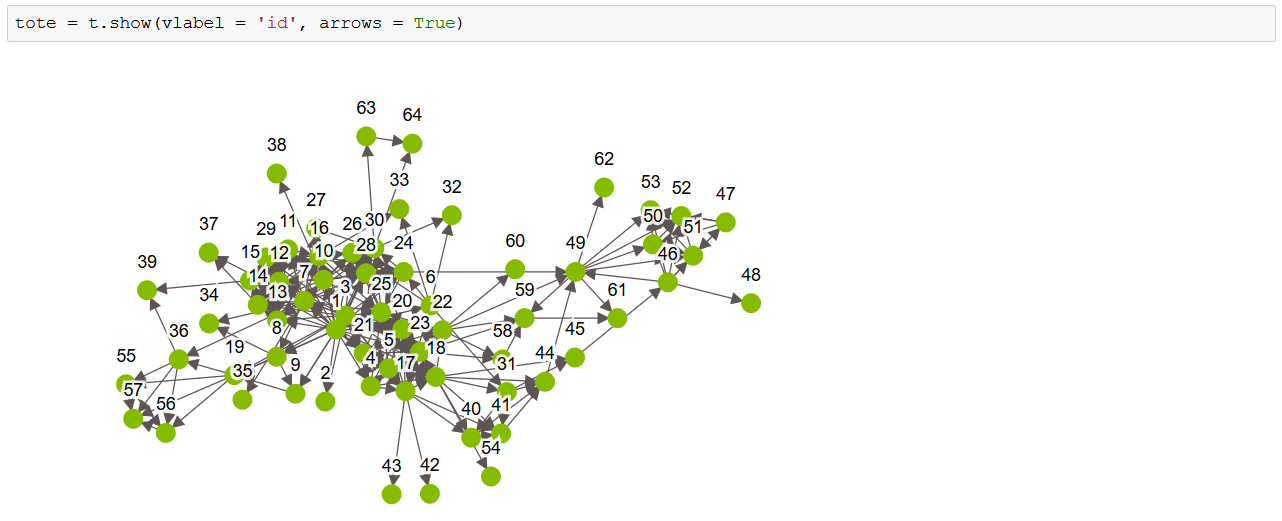

In [19]:
Image(filename=("C:\Users\Georgia\Documents\GitHub\DATA620-Assignment-3\Image1.PNG"))

# Networkx
###### Adding nodes and edges manually

In [20]:
g = nx.Graph()

g.add_nodes_from([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,
                  3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,6,6,6,6,6,6,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,
                  8,8,8,9,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,11,11,11,11,11,11,12,12,12,12,12,13,13,13,13,
                  14,14,14,14,15,15,15,16,16,16,16,16,16,16,17,17,17,17,17,17,17,17,17,17,18,18,18,18,18,18,18,18,18,
                  18,18,19,19,19,19,20,20,20,20,20,21,21,21,22,22,22,22,22,22,23,23,23,24,24,24,24,24,25,25,25,26,26,
                  27,30,30,30,31,31,31,31,36,36,36,36,40,40,41,44,45,46,46,46,46,46,46,46,47,47,47,47,49,49,49,49,49,
                  49,49,50,50,50,51,51,52,55,55,56,58,59,63])

In [21]:
g.add_weighted_edges_from([(1,2,1),(1,3,3),(1,4,1),(1,5,1),(1,6,1),(1,7,4),(1,8,1),
(1,9,1),(1,10,4),(1,11,1),(1,12,1),(1,13,2),(1,14,2),(1,15,2),(1,16,2),
(1,17,1),(1,18,1),(1,19,1),(1,20,1),(1,21,1),(1,22,1),(1,23,1),(1,24,2),
(1,25,2),(1,26,1),(1,27,1),(1,28,1),(1,29,1),(1,30,1),(2,3,1),(3,4,1),
(3,5,1),(3,7,3),(3,8,1),(3,9,1),(3,10,2),(3,11,1),(3,12,1),(3,13,1),
(3,14,1),(3,15,1),(3,16,2),(3,17,1),(3,18,1),(3,19,1),(3,20,1),(3,21,1),
(3,22,1),(3,22,1),(3,23,1),(3,24,1),(3,25,2),(3,26,1),(3,28,1),(3,29,1),
(3,30,1),(4,5,1),(4,17,1),(4,18,1),(4,20,1),(4,21,1),(4,22,1),(4,23,1),
(4,25,1),(5,17,1),(5,18,1),(5,20,1),(5,21,1),(5,22,1),(5,23,1),(5,25,1),
(6,17,1),(6,24,1),(6,26,1),(6,31,1),(6,32,1),(6,33,1),(7,8,1),(7,10,3),
(7,11,1),(7,12,1),(7,13,1),(7,14,2),(7,15,2),(7,16,3),(7,21,1),(7,24,1),
(7,25,1),(7,26,1),(7,27,1),(7,28,2),(7,29,2),(7,30,1),(7,34,1),(7,35,1),
(7,36,1),(7,37,1),(8,9,1),(8,19,1),(8,34,2),(9,19,1),(10,11,1),(10,12,1),(10,13,1),
(10,14,2),(10,15,1),(10,16,2),(10,21,1),(10,24,1),(10,25,1),(10,26,1),(10,27,1),
(10,28,1),(10,29,1),(10,30,2),(10,38,1),(11,12,1),(11,13,1),(11,14,1),(11,15,1),
(11,16,1),(11,29,1),(12,13,1),(12,14,2),(12,15,2),(12,16,1),(12,29,1),(13,14,3),
(13,15,2),(13,16,1),(13,29,1),(14,15,3),(14,16,1),(14,29,1),(14,37,1),(15,16,1),
(15,29,1),(15,39,1),(16,24,1),(16,25,1),(16,26,1),(16,28,1),(16,29,1),(16,30,1),
(16,33,1),(17,18,1),(17,20,1),(17,21,1),(17,22,1),(17,23,1),(17,25,1),(17,40,1),
(17,41,1),(17,42,1),(17,43,1),(18,20,1),(18,21,1),(18,22,1),(18,23,1),
(18,25,1),(18,31,1),(18,40,1),(18,41,1),(18,44,1),(18,45,1),(18,54,1),(19,36,1),
(19,55,1),(19,56,1),(19,57,1),(20,21,1),(20,22,1),(20,23,1),(20,25,1),(20,30,1),
(21,22,1),(21,23,1),(21,25,1),(22,23,1),(22,25,1),(22,49,1),(22,58,1),(22,59,1),
(22,60,1),(23,25,1),(23,58,1),(23,59,1),(24,25,1),(24,26,1),(24,28,1),
(24,30,1),(24,49,1),(25,26,1),(25,28,1),(25,30,1),(26,28,1),(26,30,1),(27,30,1),
(30,32,1),(30,63,1),(30,64,1),(31,40,1),(31,41,1),(31,44,1),(31,45,1),(36,39,1),
(36,55,1),(36,56,1),(36,57,2),(40,41,1),(40,44,1),(41,44,1),(44,49,1),(45,46,1),
(46,47,1),(46,48,1),(46,49,1),(46,50,1),(46,51,1),(46,52,1),(46,53,1),(47,50,1),
(47,51,1),(47,52,1),(47,53,1),(49,50,1),(49,51,1),(49,52,1),(49,53,1),(49,59,1),
(49,61,1),(49,62,1),(50,51,1),(50,52,1),(50,53,1),(51,52,1),(51,53,1),(52,53,1),
(55,56,1),(55,57,1),(56,57,1),(58,59,1),(59,61,1),(63,64,1)])

In [22]:
g.number_of_nodes() # Number of Nodes

64

In [23]:
g.number_of_edges() # Number of Edges

243

###### Plot in Networkx

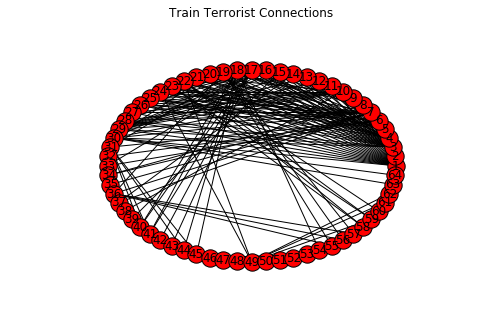

In [24]:
nx.draw_circular(g, with_labels=True)
plt.title('Train Terrorist Connections')
plt.show()

##### Find centrality measures

In [25]:
# Diameter
# The maximum distance of a node to all other nodes in the graph
print nx.diameter(g)

6


In [26]:
# Average of shortest paths
print(nx.average_shortest_path_length(g))

2.69097222222


In [27]:
# Undirected graph to find centrality measures
g_ud = g.to_undirected()

In [28]:
#### Centrality ####

# Betweenness Centrality
# The number of shortest paths that pass through a node
Between = nx.betweenness_centrality(g_ud)

# Closeness Centrality
# How near a node is to all other nodes in a network
Close = nx.closeness_centrality(g_ud)

# Eigenvector Centrality
# The sum of the centrality values of the nodes connected to a node
Eigen = nx.eigenvector_centrality(g_ud)


##### Top ten nodes with the highest centrality measures

In [29]:
# Finding the nodes with the top values for each centrality measure
def get_top_keys(dictionary, top):
    items = dictionary.items()
    items.sort(reverse=True, key=lambda x: x[1])
    return map(lambda x: x[0], items[:top])
top_between = get_top_keys(Between,10)
top_close = get_top_keys(Close,10)
top_eigen = get_top_keys(Eigen,10)

print top_between

[49, 1, 3, 24, 7, 22, 18, 17, 30, 19]


In [30]:
print top_close

[1, 3, 25, 7, 22, 24, 18, 10, 17, 21]


In [31]:
print top_eigen

[1, 7, 3, 10, 16, 14, 15, 13, 25, 12]


##### Plot of nodes with the highest centrality measures

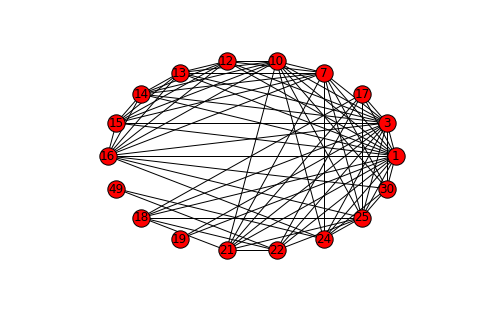

In [32]:
H = g.subgraph([49, 1, 3, 24, 7, 22, 18, 17, 30, 19, 25, 10, 21, 16, 14, 15, 13, 12])
nx.draw_circular(H, with_labels=True)
plt.show()

##### Show the plot in graphlab while highlighting the individuals with high centrality measures

In [33]:
t.show(highlight=[49, 1, 3, 24, 7, 22, 18, 17, 30, 19, 25, 10, 21, 16, 14, 15, 13, 12], vlabel='id', arrows=True)

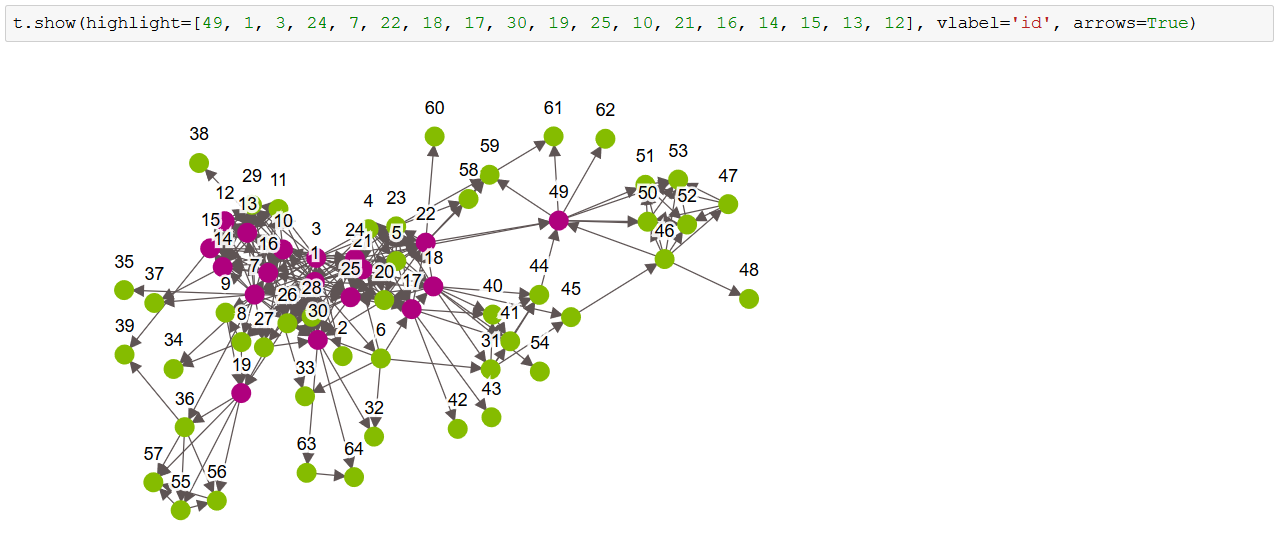

In [35]:
Image(filename=("C:\Users\Georgia\Documents\GitHub\DATA620-Assignment-3\Image2.PNG"))

##### Conclusion: From the very first Graphlab plot, we see that there are several clusters of terrorists that seem to have contact with each other. There is a primary group (where most of the nodes are focused) and then there are smaller ones (ex, the group [55, 56, 57], the group [46, 47, 50, 51, 52, 53] etc.). However, through the first circular Networkx graph, we see that a lot of communication occured among half of the members, which implies that there does exists if not a hierarchy, then definitely some form of social interaction that holds a level of importance (probably showing that some individuals either have more sway or they carry messages among groups). After finding the top ten nodes for betweenness centrality, eigenvecture centrality and closeness centrality (some values which overlapped), a second Networkx graph showed that each individual (with the exception of node 49) had communication with at least half of individuals with top centrality measures. A second Graphlab plot highlighting these individuals better shows the interaction among these individuals and the rest of the terrorists. Interestingly enough, the smaller groups (especially the two mentioned earlier as examples) do not have an influential figure within them, even though they are in contact with one. This leads to the belief that at least two of the highlighted nodes (19 and 49 in particular) have higher centrality measures while playing the position of messenger moreso than organizer.